In [174]:
#02450 - Introduction to Machine Learning and Data Mining
#Assignment 2
#Students:
#Everton Spader - s190045
#Lucas Beltram - s182360

from matplotlib.pylab import figure, subplot, plot, xlabel, ylabel, hist, show, ylim, xlim
import scipy.linalg as linalg
import numpy as np
import pandas as pd
import sklearn.linear_model as lm

In [195]:
# Load the csv dataset into a pandas data frame
filename = 'https://web.stanford.edu/~hastie/ElemStatLearn//datasets/SAheart.data'
df = pd.read_csv(filename)
raw_data = df.get_values()

X = raw_data[:,1:]
N,M = X.shape
y = np.zeros(shape=(N,1))

classNames = ['CHD Negative','CHD Positive']
C = len(classNames)

cols = range(1, M+1) 

In [196]:
#Extract attribute names
attributeNames = np.asarray(df.columns[cols]).tolist()

#Convert attribute 'famhist' with list comprehension: 0-Absent; 1-Present 
famHistNames = X[:,4]
famHistLabels = np.unique(famHistNames)
famHistDict = dict(zip(famHistLabels,[0,1]))
famHistLc = np.array([famHistDict[cl] for cl in famHistNames])
X = np.hstack((X[:,0:4],np.array([famHistLc]).T,X[:,5:])).astype(np.float)

#Attribute to be predicted based on the other attributes
obesity_idx = attributeNames.index('obesity')

#Attributes to remove for regression
famhist_idx = attributeNames.index('famhist')
chd_idx = attributeNames.index('chd')

In [197]:
#Feature transformation
y = X[:,obesity_idx]

X = X - np.ones((N,1))*X.mean(0)
X = X/np.std(X,0)


X_cols = list(range(0,famhist_idx))+ list(range(famhist_idx+1,obesity_idx))+list(range(obesity_idx+1,chd_idx))
#X_cols = list(range(0,alcohol_idx))+list(range(alcohol_idx+1,len(attributeNames)))

X = X[:,X_cols]

In [198]:
#Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

#Predict alcohol consumption
y_est = model.predict(X)
residual = y_est-y

Text(0, 0.5, 'Obesity (estimated)')

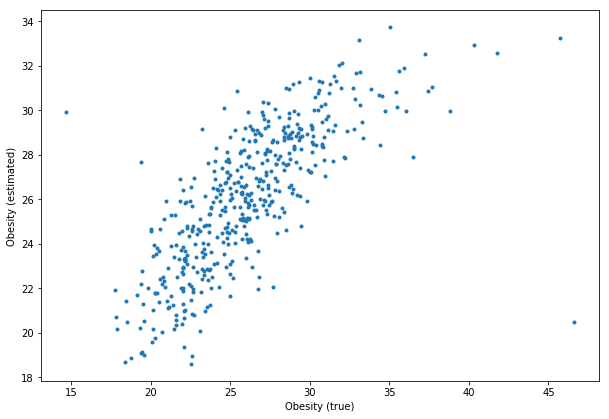

In [199]:
#Display result in a scatter plot
figure(figsize=(10,15))
subplot(2,1,1)
plot(y,y_est,'.')
#ylim([10,50])
#xlim([10,50])
xlabel('Obesity (true)')
ylabel('Obesity (estimated)')

In [192]:
y

array([-1.76785883e-01,  6.71372906e-01,  7.35519369e-01,  1.41262092e+00,
       -1.28560332e-02,  1.12277394e+00, -1.24351781e+00, -6.97084972e-01,
       -2.81320860e-01,  9.65971477e-01,  1.81959151e-01, -7.01836562e-01,
       -1.06295739e+00, -5.73543636e-01, -5.97301585e-01, -3.66139824e-02,
       -1.74410088e-01,  1.58842975e+00,  7.73532088e-01,  9.61219887e-01,
       -1.21738406e+00,  2.75324806e-02, -3.33588348e-01,  6.30984392e-01,
        3.46598654e-02, -6.68575433e-01,  3.03053727e+00, -1.20788088e+00,
        8.04417422e-01,  4.81309312e-01, -9.94059338e-01, -9.29912875e-01,
        4.81309312e-01,  9.99232606e-01,  9.01825014e-01, -1.55712274e+00,
        3.12627872e-01,  1.15365928e+00, -2.81320860e-01,  3.88653310e-01,
        1.17266564e+00, -5.45034097e-01, -9.25161286e-01,  5.84178147e-02,
        4.87890572e+00, -7.35097691e-01, -7.93782911e-02,  9.42213528e-01,
       -1.39556868e+00,  1.06575486e+00,  7.04634035e-01,  2.72239358e-01,
        6.16729623e-01, -